# CP213: Tutorial Notebook S2 Week 5

## Question 1

Consider a lamina  bounded by $x^2+y^2=1\,\mathrm{m}^2$ with density function $\rho(x,y) = \sqrt{x^2+y^2}$, in units of $\mathrm{g\,m^{-2}}$.
1. Determine the mass of the laminate
2. Determine the moment of inertia about the origin.



In [ ]:
import sympy as smp

theta, r, m,x,y = smp.symbols('theta, r, m, x, y ')
function = smp.sqrt(y**2 + x**2) * r 
cart = function.subs(x,r*smp.cos(theta)).subs(y,r*smp.sin(theta))
ans = smp.integrate(cart, (theta, 0, 2*smp.pi), (r, 0, 1))
ans





2*pi/3

In [ ]:
f2 = smp.sqrt(x**2+y**2)*(x**2+y**2)*r
cart2 = f2.subs(x,(r*smp.cos(theta))).subs(y,(r*smp.sin(theta)))
ans = smp.integrate(cart2, (theta, 0, 2*smp.pi), (r, 0, 1))
ans

2*pi/5

## Question 2

For the remaining questions, please refer to the formula sheet  which can be found under the learning materials on the class site for the Taylor series.

Differentiate the Maclaurin series of $\sin{x}$ and show that the result is equivalent to the Maclaurin series for $\cos{x}$.

In [ ]:
from sympy.multipledispatch.dispatcher import restart_ordering
import sympy as smp
x = smp.symbols('x')
func = smp.sin(x)
n = 10
x0 = 0
res = func.subs(x,x0)
for i in range(1,n):
  res += smp.diff(func,x,i).subs(x,x0)*(x-x0)**i/smp.factorial(i)
display(res)

x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x

In [ ]:
x = smp.symbols('x')

func2 = smp.cos(x)
n = 10
x0 = 0
result2 = func2.subs(x,x0)

for i in range(1,n):
  result2 += smp.diff(func2,x,i).subs(x,x0)*(x-x0)**i/smp.factorial(i)
display(result2)

x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1

In [ ]:
smp.diff(res,x)

x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1

## Question 3


A useful application of Taylor series is that we can determine the limit a function approaches as x tends to a particular point. 
\begin{align*}
    \lim_{x\to 0} \frac{e^x - 1 - x}{x^2}
\end{align*}
As a starting point attempt try evaluating the expression with a calculator at values close to $x=0$ (you may be surprised by the result). Then, using appropriate Taylor series substitutions determine evaluate the above expression.



In [ ]:
from sympy import limit, sin, oo
from sympy.abc import x
limit((smp.exp(x)-1-x)/x**2, x, 0)

1/2

In [ ]:
x = smp.symbols('x')

func2 = (smp.exp(x)-1-x)/x**2
n = 10
x0 = 1/2
result2 = func2.subs(x,x0)

for i in range(1,n):
  result2 += smp.diff(func2,x,i).subs(x,x0)*(x-x0)**i/smp.factorial(i)
display(result2)

0.215344751598462*x + 3.80504451485288e-8*(x - 0.5)**9 + 4.15494642327004e-7*(x - 0.5)**8 + 4.11842657294051e-6*(x - 0.5)**7 + 3.66686043405383e-5*(x - 0.5)**6 + 0.000289429025312623*(x - 0.5)**5 + 0.00199129447736945*(x - 0.5)**4 + 0.0116756921888044*(x - 0.5)**3 + 0.0565232038043586*(x - 0.5)**2 + 0.487212707001282

## Question 4

Find an approximate value for
\begin{align*}
    \int_0^1 \cos({x^2})\, dx
\end{align*}
giving your answer to three decimal points by finding the first three non-zero terms of the Maclaurin series for $\cos({x^2})$. Using the fourth non-zero Maclaurin series term, explain why the error in using this estimate is less than 0.001.

In [ ]:
import sympy as smp
x = smp.symbols('x')

func2 = (smp.cos(x**2))
n = 9
taylor_expansion = smp.series(func2, x, 0, n).removeO()
display(taylor_expansion)

smp.integrate(taylor_expansion,(x,0,1))

x**8/24 - x**4/2 + 1

977/1080

In [ ]:
n = 13
taylor_expansion = smp.series(func2, x, 0, n).removeO()
display(taylor_expansion)

-x**12/720 + x**8/24 - x**4/2 + 1

25399/28080

In [ ]:
#Fourth term
f = -x**12/720
smp.integrate(f,(x,0,1))

-1/9360

this is a tiny area therefor the error is very small

## Bonus Python question

Try to follow this excellent resource for [Taylor Series in Python}](https://pythonforundergradengineers.com/creating-taylor-series-functions-with-python.html) by Peter Kazarinoff. Copy the code blocks 14 and 18, which relate to $\cos{x}$, into the notebook and try to adapt the code for $\sin{x}$.

NB. It may be helpful to note that summation form of the taylor expansion for $\sin{x}$ is given by:
\begin{align*}
    \sin \left( x \right) \approx \sum\limits_{n = 0}^\infty  {{{\left( { - 1} \right)}^n}\frac{{{x^{2n+1}}}}{{\left( {2n+1} \right)!}}}
\end{align*}

In [ ]:
import math

def func_sin(x, n):
    sin_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = ((x -np.pi/2)**(2*i))
        denom = math.factorial(2*i)
        sin_approx += ( coef ) * ( (num)/(denom) )
    
    return sin_approx 

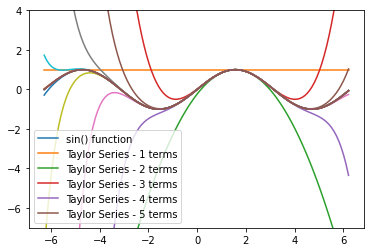

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_sin = np.sin(angles) 

fig, ax = plt.subplots()
ax.plot(angles,p_sin)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,16):
    t_sin = [func_sin(angle,i)  for angle in angles]
    ax.plot(angles,t_sin)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['sin() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()
